<a href="https://colab.research.google.com/github/stinajoss/Bibliometri_GU/blob/main/congenital_heart_defects_sweden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Export data to Excel**

In [7]:
# Install necessary libraries
!pip install biopython pandas openpyxl

# Importing libraries
from Bio import Entrez
import pandas as pd

# Set up Entrez email for API access
Entrez.email = "your.email@example.com"

# ===========================================
# PubMed queries
# ===========================================

#SU
query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND (("sahlgrenska university hospital"[Affiliation] OR "sahlgrenska university"[Affiliation] OR "queen silv*"[Affiliation]) AND 1994/01/01:2024/12/31[Date - Publication])'

#SU/GU/VGR
#query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND (("Region Vastra Gotaland"[Affiliation] OR "University of Gothenburg"[Affiliation] OR "Gothenburg University"[Affiliation] OR "Sahlgrenska University Hospital"[Affiliation] OR "Sahlgrenska Academy"[Affiliation] OR "VGR"[Affiliation] OR "NU-hospital"[Affiliation] OR "university west trollhattan"[Affiliation] OR "Skaraborgs Hospital"[Affiliation] OR "Southern Alvsborg"[Affiliation] OR "Northern Alvsborg"[Affiliation] OR "Queen Silvia Childrens Hospital"[Affiliation] OR "Alingsas Hospital"[Affiliation]) AND 1994/01/01:2024/12/31[Date - Publication])'

#Sweden
#query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND ("sweden"[Affiliation] AND 1994/01/01:2024/12/31[Date - Publication])'

# ===========================================
# Fetch data
# ===========================================

handle = Entrez.esearch(db="pubmed", term=query, retmax=1000)
record = Entrez.read(handle)
handle.close()

# Get list of PubMed IDs
id_list = record["IdList"]

# Function to fetch PubMed data using IDs
def fetch_pubmed_data(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)
    handle.close()
    return records

# Fetching the data
pubmed_data = fetch_pubmed_data(id_list)

# Extract relevant fields and store them in a list
publications = []

for article in pubmed_data['PubmedArticle']:
    pmid = article['MedlineCitation']['PMID']
    title = article['MedlineCitation']['Article']['ArticleTitle']

    # Extract authors
    try:
        authors = ', '.join([author['LastName'] + ' ' + author['ForeName'] for author in article['MedlineCitation']['Article']['AuthorList']])
    except:
        authors = ''

    # Extract journal/book
    try:
        journal_book = article['MedlineCitation']['Article']['Journal']['Title']
    except:
        journal_book = 'Book'

    # Extract publication year
    try:
        pub_year = article['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']['Year']
    except:
        pub_year = ''

    # Extract Mesh terms
    try:
        mesh_terms = ', '.join([mesh['DescriptorName'] for mesh in article['MedlineCitation']['MeshHeadingList']])
    except:
        mesh_terms = ''

    # Extract DOI
    try:
        doi = [eloc_id for eloc_id in article['MedlineCitation']['Article']['ELocationID'] if eloc_id.attributes['EIdType'] == 'doi'][0]
    except:
        doi = ''

    # Extract affiliations from all authors
    affiliations = []
    try:
        for author in article['MedlineCitation']['Article']['AuthorList']:
            if 'AffiliationInfo' in author:
                affiliations += [affil['Affiliation'] for affil in author['AffiliationInfo']]
        affiliations = ', '.join(affiliations)  # Combine all affiliations into a single string
    except:
        affiliations = ''

    # Construct the citation (simplified as title + year)
    citation = f"{title} ({pub_year})"

    publications.append({
        'PMID': pmid,
        'PublicationYear': pub_year,
        'Title': title,
        'Authors': authors,
        'Journal/Book': journal_book,
        'Affiliations': affiliations,
        'Mesh Terms': mesh_terms,
        'DOI': doi,
    })

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(publications)

# ===========================================
# Save to Excel
# ===========================================
#df.to_excel('publications_output_sweden.xlsx', index=False)
#df.to_excel('publications_output_su_gu_vgr.xlsx', index=False)
df.to_excel('publications_output_su.xlsx', index=False)

print("Data saved to publications_output.xlsx")


Data saved to publications_output.xlsx


# **Plot top 10 affiliations**

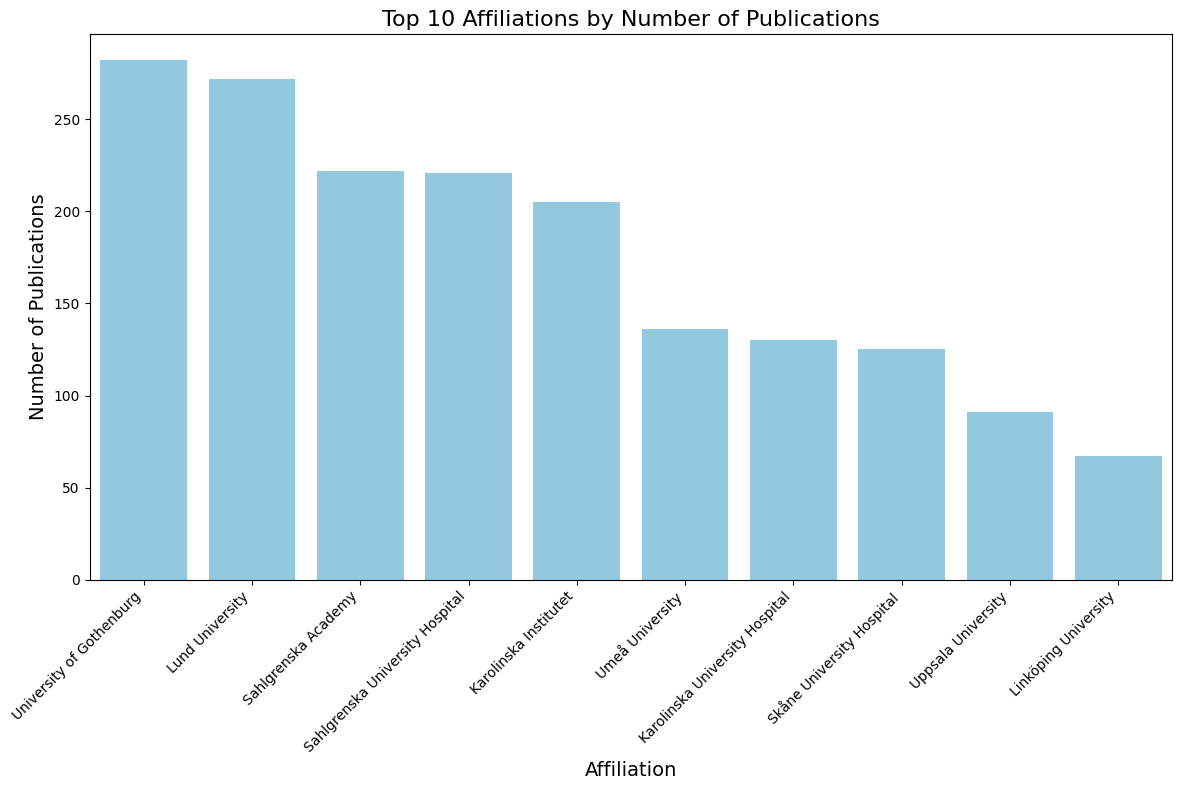

In [13]:
# Install necessary libraries
!pip install biopython pandas openpyxl matplotlib seaborn

# Importing libraries
from Bio import Entrez
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Entrez email for API access
Entrez.email = "your.email@example.com"

# ===========================================
# PubMed queries
# ===========================================

# Example query for Sweden
query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND ("sweden"[Affiliation] AND 1994/01/01:2024/12/31[Date - Publication])'

# ===========================================
# Fetch data
# ===========================================

handle = Entrez.esearch(db="pubmed", term=query, retmax=1000)
record = Entrez.read(handle)
handle.close()

# Get list of PubMed IDs
id_list = record["IdList"]

# Fetch details for each publication
def fetch_pubmed_data(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)
    handle.close()
    return records

# Fetching the data
pubmed_data = fetch_pubmed_data(id_list)

# Extract relevant fields including affiliations
publications = []

for article in pubmed_data['PubmedArticle']:
    title = article['MedlineCitation']['Article']['ArticleTitle']

    try:
        year = article['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']['Year']
    except:
        year = None

    try:
        authors = [author['LastName'] + ' ' + author['ForeName'] for author in article['MedlineCitation']['Article']['AuthorList']]
    except:
        authors = []

    # Extract affiliations from all authors, ensuring each affiliation is counted only once per article
    affiliations = set()  # Use a set to avoid counting duplicate affiliations per article
    try:
        for author in article['MedlineCitation']['Article']['AuthorList']:
            if 'AffiliationInfo' in author:
                affiliations.update([affil['Affiliation'] for affil in author['AffiliationInfo']])  # Add to set to ensure uniqueness
    except:
        affiliations = set()

    publications.append({
        'title': title,
        'year': year,
        'authors': authors,
        'affiliations': list(affiliations),  # Convert the set back to a list
    })

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(publications)

# ===========================================
# Extract and count relevant affiliations (unique per publication)
# ===========================================

# List of affiliations to count
affiliation_keywords = [
    "University of Gothenburg", "Karolinska University Hospital",
    "Karolinska Institutet", "Sahlgrenska Academy",
    "Sahlgrenska University Hospital", "Lund University",
    "Umeå University", "Linköping University", "Uppsala University",
    "The Queen Silvia Children's Hospital", "Skåne University Hospital"
]

# Initialize a dictionary to count the occurrences of each affiliation
affiliation_counts = {keyword: 0 for keyword in affiliation_keywords}

# Count occurrences of each keyword in the unique affiliations list per publication
for index, row in df.iterrows():
    for affiliation in row['affiliations']:
        for keyword in affiliation_keywords:
            if keyword in affiliation:
                affiliation_counts[keyword] += 1

# Convert affiliation counts to DataFrame for plotting
affiliation_df = pd.DataFrame(list(affiliation_counts.items()), columns=['Affiliation', 'Count'])

# Sort by count in descending order and select the top 10
affiliation_df = affiliation_df.sort_values(by='Count', ascending=False).head(10)

# ===========================================
# Plot the affiliations as a vertical bar chart (skyblue color)
# ===========================================

plt.figure(figsize=(12,8))
sns.barplot(x='Affiliation', y='Count', data=affiliation_df, color='skyblue')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Top 10 Affiliations by Number of Publications', fontsize=16)
plt.xlabel('Affiliation', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()




# **Plot data**

In [ ]:
# Install necessary libraries
!pip install biopython pandas matplotlib seaborn

# Importing libraries
from Bio import Entrez
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Entrez email for API access
Entrez.email = "your.email@example.com"

# ===========================================
# PubMed queries
# ===========================================

#SU
#query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND (("sahlgrenska university hospital"[Affiliation] OR "sahlgrenska university"[Affiliation] OR "queen silv*"[Affiliation]) AND 1994/01/01:2024/12/31[Date - Publication])'

#SU/GU/VGR
#query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND (("Region Vastra Gotaland"[Affiliation] OR "University of Gothenburg"[Affiliation] OR "Gothenburg University"[Affiliation] OR "Sahlgrenska University Hospital"[Affiliation] OR "Sahlgrenska Academy"[Affiliation] OR "VGR"[Affiliation] OR "NU-hospital"[Affiliation] OR "university west trollhattan"[Affiliation] OR "Skaraborgs Hospital"[Affiliation] OR "Southern Alvsborg"[Affiliation] OR "Northern Alvsborg"[Affiliation] OR "Queen Silvia Childrens Hospital"[Affiliation] OR "Alingsas Hospital"[Affiliation]) AND 1994/01/01:2024/12/31[Date - Publication])'

#Sweden
query = '("heart defects, congenital"[MeSH Terms] OR "Cardiomyopathies"[MeSH Terms] OR ("congenital heart defect*"[Text Word] OR "congenital cardiac anomal*"[Text Word] OR "congenital heart disease*"[Text Word] OR "Congenital Cardiac Malformations"[Text Word] OR "cardiomyopath*"[Text Word] OR "myocardial disease*"[Text Word] OR "heart muscle disease*"[Text Word] OR "cardiac myopath*"[Text Word])) AND ("adolescent"[Text Word] OR "children"[Text Word] OR "child, preschool"[MeSH Terms] OR "infan*"[Title/Abstract] OR "infant"[MeSH Terms] OR "gestation"[Text Word] OR "neonatal"[Text Word]) AND ("sweden"[Affiliation] AND 1994/01/01:2024/12/31[Date - Publication])'


# ===========================================
# Fetch data
# ===========================================

handle = Entrez.esearch(db="pubmed", term=query, retmax=1000)
record = Entrez.read(handle)
handle.close()

# Get list of PubMed IDs
id_list = record["IdList"]

# Fetch details for each publication
def fetch_pubmed_data(id_list):
    ids = ",".join(id_list)
    handle = Entrez.efetch(db="pubmed", id=ids, retmode="xml")
    records = Entrez.read(handle)
    handle.close()
    return records

# Fetching the data
pubmed_data = fetch_pubmed_data(id_list)

# Extract relevant fields including source titles (journal titles)
publications = []

for article in pubmed_data['PubmedArticle']:
    title = article['MedlineCitation']['Article']['ArticleTitle']
    try:
        year = article['MedlineCitation']['Article']['Journal']['JournalIssue']['PubDate']['Year']
    except:
        year = None
    try:
        authors = [author['LastName'] + ' ' + author['ForeName'] for author in article['MedlineCitation']['Article']['AuthorList']]
    except:
        authors = []
    affiliations = []
    if 'AffiliationInfo' in article['MedlineCitation']['Article']:
        affiliations = [affil['Affiliation'] for affil in article['MedlineCitation']['Article']['AffiliationInfo']]
    mesh_terms = [mesh['DescriptorName'] for mesh in article['MedlineCitation']['MeshHeadingList']] if 'MeshHeadingList' in article['MedlineCitation'] else []
    keywords = article['MedlineCitation']['KeywordList'] if 'KeywordList' in article['MedlineCitation'] else []
    pub_type = article['MedlineCitation']['Article']['PublicationTypeList'][0] if 'PublicationTypeList' in article['MedlineCitation']['Article'] else None
    try:
        source_title = article['MedlineCitation']['Article']['Journal']['Title']
    except:
        source_title = None

    publications.append({
        'title': title,
        'year': year,
        'authors': authors,
        'affiliations': affiliations,
        'mesh_terms': mesh_terms,
        'keywords': keywords,
        'pub_type': pub_type,
        'source_title': source_title,  # New field for source titles
    })

# Convert to DataFrame for analysis
df = pd.DataFrame(publications)

# ===========================================
# Plot Publications per Year
# ===========================================

# Convert year column to numeric and drop missing years
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(subset=['year'], inplace=True)

# Convert to integer to remove decimals
df['year'] = df['year'].astype(int)

# Plot publications per year in monochrome with the same size as other plots
plt.figure(figsize=(12,8))  # Same size as other plots
ax = sns.countplot(data=df, x='year', color='skyblue')
plt.title('Publications per Year')
plt.xticks(rotation=90)

# Add the index values above the bars for each year
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# ===========================================
# Plot Top 10 Authors
# ===========================================

# Flatten authors list and count top authors
all_authors = [author for sublist in df['authors'] for author in sublist]
author_counts = pd.Series(all_authors).value_counts().head(10)

# Plot top 10 authors with the same size as other plots
plt.figure(figsize=(12,8))  # Same size as other plots
ax = author_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors')
plt.xticks(rotation=45)

# Add the index values above the bars for top authors
for index, value in enumerate(author_counts):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# ===========================================
# Plot Source Titles
# ===========================================

import matplotlib.pyplot as plt
import re
import pandas as pd

# Function to clean source titles by removing text in parentheses
def clean_source_title(title):
    return re.sub(r"\s*\(.*?\)", "", title)  # Remove text within parentheses and any trailing spaces

# Apply cleaning to the 'source_title' column and create a new 'cleaned_source_title' column
df['source_title'] = df['source_title'].apply(lambda x: clean_source_title(x) if pd.notnull(x) else x)

# Now remove rows with missing or null cleaned source titles
df_cleaned = df.dropna(subset=['source_title'])

# Count occurrences of cleaned source titles
source_counts = df_cleaned['source_title'].value_counts().head(10)

# Plot the top 10 cleaned source titles (journal titles)
plt.figure(figsize=(12,8))
ax = source_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Source Titles')
plt.ylabel('Number of Publications')

# Adjust the X-axis labels (rotate and align)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Align right to avoid overlap and improve readability

# Add the index values above the bars for source titles
for index, value in enumerate(source_counts):
    # Ensure values are positioned correctly, slightly above the bar and within the plot area
    ax.text(index, value + 0.2, str(value), ha='center', va='bottom', fontsize=12)

# Adjust layout to prevent label cutoff and keep everything within the visible range
plt.tight_layout()

# Show the plot
plt.show()

# ===========================================
# Plot Publication types
# ===========================================

pub_type_counts = df['pub_type'].value_counts().head(10)

# Plot top 10 publication types with better visibility
plt.figure(figsize=(12,8))

# Use a logarithmic scale to handle large differences in counts
pub_type_counts.plot(kind='bar', color='skyblue', log=True)

# Improve title and axis labels
plt.title('Top 10 Publication Types', fontsize=16)
plt.xlabel('Publication Type', fontsize=14)
plt.ylabel('Number of Publications (log scale)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add labels on top of the bars to show the exact counts
for index, value in enumerate(pub_type_counts):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

# Adjust the layout to prevent labels from getting cut off
plt.tight_layout()

# Show the plot
plt.show()

# ===========================================
# Plot Gender
# ===========================================

mesh_terms_of_interest = ["Female", "Male"]

# Initialize a dictionary to store the counts per year for each MeSH term
mesh_term_years = {term: [] for term in mesh_terms_of_interest}

# Iterate through each row in the DataFrame and count occurrences of the specified MeSH terms by year
for index, row in df.iterrows():
    year = row['year']
    mesh_terms = row['mesh_terms']

    # Ensure both year and MeSH terms are valid
    if pd.notnull(year) and mesh_terms:
        for term in mesh_terms_of_interest:
            if term in mesh_terms:
                mesh_term_years[term].append(year)

# Create a DataFrame to count the occurrences per year for each MeSH term
mesh_term_counts_by_year = pd.DataFrame({term: pd.Series(data).value_counts().sort_index() for term, data in mesh_term_years.items()})

# Apply a 3-year moving average for smoothing
smoothed_mesh_term_counts_by_year = mesh_term_counts_by_year.rolling(window=3, min_periods=1).mean()

# Plot the development of MeSH terms ("Female" and "Male") over time with a moving average
plt.figure(figsize=(12,8))

# Plot each term's count over the years
for term in mesh_terms_of_interest:
    plt.plot(smoothed_mesh_term_counts_by_year.index, smoothed_mesh_term_counts_by_year[term], marker='o', label=term)

# Add plot details
plt.title('Occurrences of "Female" and "Male" MeSH Terms Over Time (3-year moving average)')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(title='MeSH Terms Gender')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# ===========================================
# Plot Age Group
# ===========================================

mesh_terms_of_interest = ["Adolescent", "Child", "Infant",]

# Filter MeSH terms and count occurrences per year
mesh_term_years = {term: [] for term in mesh_terms_of_interest}  # Dictionary to store counts over time

# Iterate through each row and count MeSH term occurrences by year
for index, row in df.iterrows():
    year = row['year']
    mesh_terms = row['mesh_terms']
    if pd.notnull(year) and mesh_terms:  # Ensure both year and MeSH terms are valid
        for term in mesh_terms_of_interest:
            if term in mesh_terms:
                mesh_term_years[term].append(year)

# Create a DataFrame to count the occurrences per year for each MeSH term
mesh_term_counts_by_year = pd.DataFrame({term: pd.Series(data).value_counts().sort_index() for term, data in mesh_term_years.items()})

# Apply a moving average (window size of 3 years for smoothing)
smoothed_mesh_term_counts_by_year = mesh_term_counts_by_year.rolling(window=3, min_periods=1).mean()

# Plot development of MeSH terms over time as a smooth line graph
plt.figure(figsize=(12,8))
for term in mesh_terms_of_interest:
    plt.plot(smoothed_mesh_term_counts_by_year.index, smoothed_mesh_term_counts_by_year[term], marker='o', label=term)

# Add plot details
plt.title('Development of Specified MeSH Terms Over Time (3-year moving average)')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(title='MeSH Terms Age Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

